Group Members:

Gowtham Kuntumalla (gowtham4)

Akhilesh Somani (somani4)

Manan Mehta (mananm2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
%matplotlib inline

# Task 0

### 1. Import the csv data

In [2]:
df_dsg = pd.read_csv('mp1_av_disengagements.csv')
df_miles = pd.read_csv('mp1_av_totalmiles.csv')

### 2(a) Total number of disengagements 

In [3]:
total_disengagements = df_miles['total number of disengagements'].sum()
print(total_disengagements)

1024


### 2(b) Number of unique months

In [4]:
num_unique_months = df_miles['Month'].nunique()
print(num_unique_months)

15


### 2(c) List of unique locations

In [5]:
unique_locations = df_dsg['Location'].unique().tolist()
print(unique_locations)

['urban-street', 'highway']


### 2(d) Number of unique cases

In [6]:
num_unique_causes = df_dsg['Cause'].nunique()
print(num_unique_causes)

10


### 2(e) Missing Values

In [7]:
#missing values for disengagement.csv
index_cols_missing_values = df_dsg.isnull().sum().nonzero()
cols_missing_values = df_dsg.columns[index_cols_missing_values]
dsg_missing_values = df_dsg[cols_missing_values].isnull().sum()
print('For the disengagement dataset')
print('None' if len(dsg_missing_values)==0 else dsg_missing_values)

#missing values for totalmiles.csv
index_cols_missing_values = df_miles.isnull().sum().nonzero()
cols_missing_values = df_miles.columns[index_cols_missing_values]
miles_missing_values = df_miles[cols_missing_values].isnull().sum()
print('\nFor the totalmiles dataset')
print('None' if len(miles_missing_values)==0 else miles_missing_values)

For the disengagement dataset
ReactionTime    532
dtype: int64

For the totalmiles dataset
None


### 3. Plot the pie chart for causes of disengagement

2 leading causes - Unwanted Driver Discomfort & Recklessly behaving agent


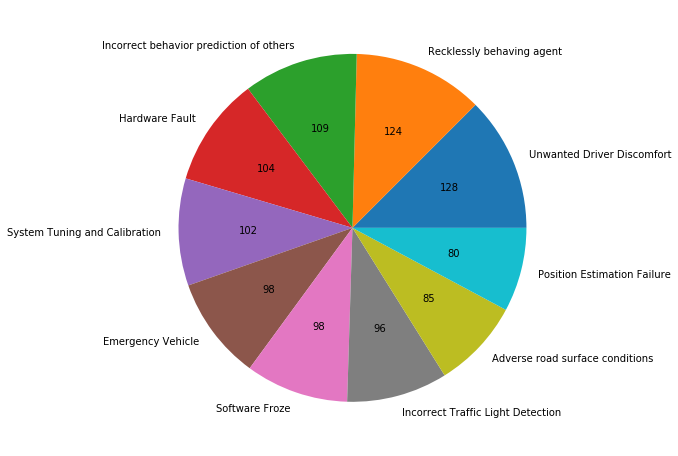

In [8]:
causes = df_dsg['Cause'].value_counts()
plt.figure(figsize = (8,8))
patches, texts, _ = plt.pie(causes, labels=causes.keys(), autopct = lambda p: '{:.0f}'.format(p*sum(causes)/100))
print('2 leading causes - Unwanted Driver Discomfort & Recklessly behaving agent')

### 4. Visualize the trend of disengagement/mile with monthly granularity

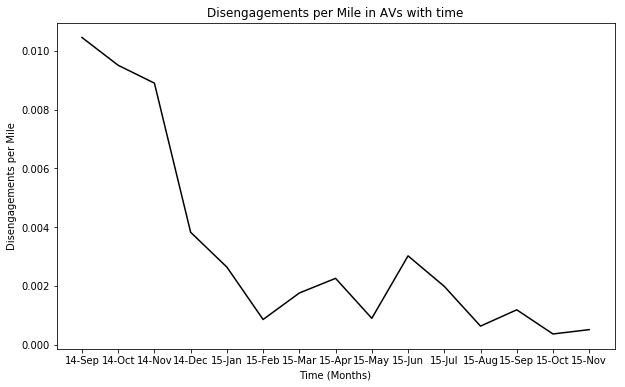

Yes, AVs are maturing over time


In [4]:
df_miles['Disengagement/Mile'] = df_miles['total number of disengagements']/df_miles['miles driven in autonomous mode']
df_miles_toplot = df_miles[df_miles['Car'] == df_miles.loc[0,'Car']]

plt.figure(figsize = (10,6))
plt.plot(df_miles_toplot['Month'], df_miles_toplot['Disengagement/Mile'], color = 'black')
ax = plt.gca()
ax.set_xlabel('Time (Months)')
ax.set_ylabel('Disengagements per Mile')
ax.set_title('Disengagements per Mile in AVs with time')
plt.show()
print('Yes, AVs are maturing over time')

# Task 1

### 1. What do each of the following distributions signify about samples drawn from them:
### (a) Gaussian
PDF: $f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$

### (b) Exponential
PDF: $ 
f(x;\lambda) = 
\begin{cases} 
\lambda e^{-\lambda x} & x \ge 0 \\
0 & x < 0
\end{cases}$

### (c) Weibull
PDF: $
f(x;\lambda ,k)=
\begin{cases}
{\frac {k}{\lambda}}\left({\frac {x}{\lambda }}\right)^{k-1}e^{-(x/\lambda )^{k}} & x \geq 0\\
0 & x<0
\end{cases}$

### 2. Plot the probability distribution of reaction times. Does this distribution fit any known distributions (Gaussian, Weibull, Exponential)? What does the fit distribution signify?

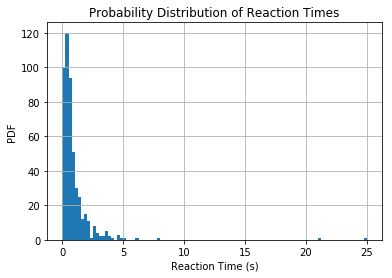

In [10]:
hist = df_dsg['ReactionTime'].dropna().hist(bins = 100)
plt.title('Probability Distribution of Reaction Times')
plt.xlabel('Reaction Time (s)')
plt.ylabel('PDF')
plt.show()

In [11]:
# This function was taken from an external source (stackoverflow) and edited to fit our code
# https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3

def get_best_distribution(data, distributions):
    results = []
    parameters = {}
    for distribution in distributions:
        dist = getattr(st, distribution)
        # fit the distribution and get parameters
        parameter = dist.fit(data)
        parameters[distribution] = parameter
        
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, distribution, args=parameter)
        results.append((distribution, p))

    # select the best fitted distribution
    best_distribution, best_p_value = (max(results, key = lambda item: item[1]))

    print("Best fitting distribution: " + str(best_distribution))
    print("Best p value: "+ str(best_p_value))
    print("Parameters for the best fit: "+ str(parameters[best_distribution]))

    return best_distribution, best_p_value, parameters[best_distribution]

In [12]:
data_to_fit = df_dsg['ReactionTime'].dropna()
distributions = ['norm','expon','exponweib','weibull_min']
best_distribution, best_p_value, parameters = get_best_distribution(data_to_fit, distributions)

Best fitting distribution: exponweib
Best p value: 0.5797693796632608
Parameters for the best fit: (62.13448003707407, 0.304116246270133, -0.09454998901334455, 0.00459917324040706)


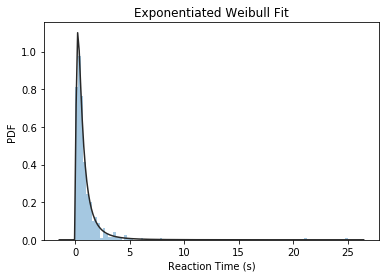

In [13]:
sns.distplot(df_dsg['ReactionTime'].dropna(), kde=False, fit=st.exponweib, bins=100)
plt.title('Exponentiated Weibull Fit')
plt.xlabel('Reaction Time (s)')
plt.ylabel('PDF')
plt.show()

The best fit is exponentiated weibull. Important parameter is k = 0.3 < 1. This signifies that the probability of the driver's reaction time is high for low reaction times and vice versa.

### 3(a) Average Reaction Time for the entire dataset

In [14]:
avg_rxn_time = df_dsg['ReactionTime'].dropna().mean()
print('The overall average reaction time is ' + str(avg_rxn_time))

The overall average reaction time is 0.9297703252032526


### 3(b) Average Reaction Time by location

In [15]:
avg_rxn_time_by_location = df_dsg.groupby('Location')['ReactionTime'].mean()
print(avg_rxn_time_by_location)

Location
highway         1.48000
urban-street    0.92865
Name: ReactionTime, dtype: float64


### 4. It is known that the mean reaction time for humans in non-AV cars is 1.09 seconds. Is the mean reaction time for humans in AV cars different from non-AV cars? Perform a hypothesis testing at a 0.05 significance level.

In [16]:
# We use the t-test for the required hypothesis testing between means
data_for_ttest = df_dsg['ReactionTime'].dropna()
t_statistic, p_value = st.ttest_1samp(data_for_ttest, 1.09)

print('Null Hypothesis --> Mean Reaction Time in AV cars is not different from non-AV cars')
print('Alternate Hypothesis --> Mean Reaction Time in AV cars is different from non-AV cars')
print('p-value in t-test = {}'.format(p_value))
print('Significance level = 0.05')
if p_value > 0.05:
    print('\np-value > significance level\nDo not reject null hypothesis\nHuman mean reaction time in AV cars is NOT DIFFERENT from non-AV cars')
else:
    print('\np-value < significance level\nAccept alternate hypothesis\nHuman mean reaction time in AV cars IS DIFFERENT from non-AV cars')

Null Hypothesis --> Mean Reaction Time in AV cars is not different from non-AV cars
Alternate Hypothesis --> Mean Reaction Time in AV cars is different from non-AV cars
p-value in t-test = 0.03636206696694606
Significance level = 0.05

p-value < significance level
Accept alternate hypothesis
Human mean reaction time in AV cars IS DIFFERENT from non-AV cars


### 5. Plot the probability distribution of disengagements/mile with monthly granularity. Does this distribution fit any known distributions (Gaussian, Weibull, Exponential)? What does the distribution that fits signify?

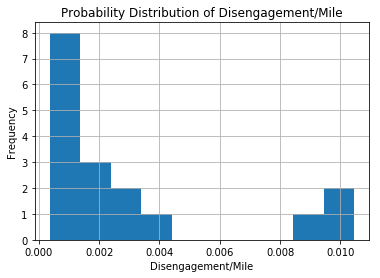

In [17]:
hist = df_miles['Disengagement/Mile'].dropna().hist(bins = 10)
plt.title('Probability Distribution of Disengagement/Mile')
plt.xlabel('Disengagement/Mile')
plt.ylabel('Frequency')
plt.show()

In [18]:
data_to_fit = df_miles['Disengagement/Mile'].dropna()
distributions = ['norm','expon','exponweib','weibull_min']
best_distribution, best_p_value, parameters = get_best_distribution(data_to_fit, distributions)

Best fitting distribution: weibull_min
Best p value: 0.4962771751155637
Parameters for the best fit: (0.6345691062722936, 0.0003605973188528762, 0.003454002298430405)


C:\Users\Manan R Mehta\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1380: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


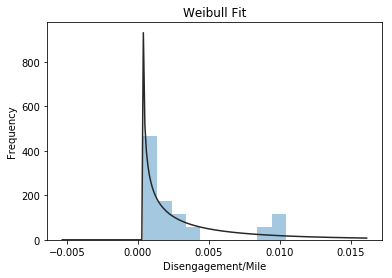

In [19]:
ax = sns.distplot(df_miles['Disengagement/Mile'].dropna(), kde=False, fit=st.weibull_min, bins=10)
plt.title('Weibull Fit')
plt.xlabel('Disengagement/Mile')
plt.ylabel('PDF')
plt.show()

The distribution fits Weibull with k = 0.63 < 1.

# Task 2

### 1(a) 
The assumption on maximum number of disengagements in a mile allows us to
treat the occurrence of a disengagement in a mile as a random variable with a **Bernoulli distribution** where the only possible outcomes in a mile are disengagement or no disengagement.

### 1(b) Based on the above assumptions, calculate the probability of disengagement per mile on a cloudy day

We first calculate the probability of disengagement per mile $ P(diseng) $

$ P(diseng) = \frac {Total Disengagements}{Total Miles} $

In [20]:
p_diseng = df_miles['total number of disengagements'].sum()/df_miles['miles driven in autonomous mode'].sum()
p_diseng

0.002026803687040926

We now use Bayes Rule as follows:
    
$$ P(diseng | cloudy) = \frac {P(cloudy | diseng) P(diseng)}{P(cloudy)} $$

We can calculate $$ P(cloudy | diseng) = \frac{\text{Number of disengagements  in  cloudy  weather}} {\text{Total disengagements}} $$ from the disengagement dataset

We are assuming $ P(cloudy) = 1 - P(clear) = 1 - 0.72 = 0.28 $

In [21]:
p_cloudy = 0.28
p_cloudy_diseng = df_dsg['Weather'].value_counts()['cloudy']/len(df_dsg)
p_diseng_cloudy = p_cloudy_diseng * p_diseng / p_cloudy
print('The probability of disengagement per mile on a cloudy day is {}'.format(p_diseng_cloudy))

The probability of disengagement per mile on a cloudy day is 0.00590255677552725


### 1(c) Based on the above assumptions, calculate the probability of disengagement per mile on a clear day

Use the same approach as in 1 (b)

$$ P(diseng | clear) = \frac {P(clear | diseng) P(diseng)}{P(clear)} $$

In [22]:
p_clear = 0.72
p_clear_diseng = df_dsg['Weather'].value_counts()['clear']/len(df_dsg)
p_diseng_clear = p_clear_diseng * p_diseng / p_clear
print('The probability of disengagement per mile on a clear day is {}'.format(p_diseng_clear))

The probability of disengagement per mile on a clear day is 0.0005195663748517999


### 1(d) Similarly, calculate the probability of an automatic disengagement per mile on a cloudy day, and the probability of an automatic disengagement per mile on a clear day.

Here we have an additional constraint of the disengagement being an automatic one. We can write

$$ P(diseng, automatic | cloudy) = \frac {P(cloudy, automatic | diseng) P(diseng)}{P(cloudy)} $$

and

$$ P(diseng, automatic | clear) = \frac {P(clear, automatic | diseng) P(diseng)}{P(clear)} $$

We can calculate $ P(cloudy, automatic | diseng) $ and $ P(clear, automatic | diseng) $ from the disengagement dataset

In [23]:
cloudy_automatic_count = 0
clear_automatic_count = 0
for i in range(len(df_dsg)):
    if (df_dsg.loc[i,'Weather']=='cloudy' and df_dsg.loc[i,'TypeOfTrigger']=='automatic'):
        cloudy_automatic_count += 1
    if (df_dsg.loc[i,'Weather']=='clear' and df_dsg.loc[i,'TypeOfTrigger']=='automatic'):
        clear_automatic_count += 1
p_cloudy_automatic_diseng = cloudy_automatic_count/len(df_dsg)
p_clear_automatic_diseng = clear_automatic_count/len(df_dsg)

p_diseng_automatic_cloudy = p_cloudy_automatic_diseng * p_diseng / p_cloudy
p_diseng_automatic_clear = p_clear_automatic_diseng * p_diseng / p_clear

print('The probability of an automatic disengagement per mile on a cloudy day is {}'.format(p_diseng_automatic_cloudy))
print('The probability of an automatic disengagement per mile on a clear day is {}'.format(p_diseng_automatic_clear))

The probability of an automatic disengagement per mile on a cloudy day is 0.0028063653172267287
The probability of an automatic disengagement per mile on a clear day is 0.00026390673008345393


### 1(e) How likely is it that in 12000 miles, there are 150 or more disengagements under cloudy conditions?

If we let $X$ be the random variable denoting the number of disengagements under cloudy conditions.

Thus, $X$ is **Binomially Distributed** with $ n = 12000 $ and $ p = P(diseng | cloudy) = 0.0059 $

Using the central limit theorem, we can say that $$ Z = \frac {X - \mu} {\sigma} $$ is **Standard Normal**, with $ \mu = np $ and $ \sigma^2 = np(1-p)$

Thus we need to find $$ P(X \ge 150) = 1 - P(X < 150) = 1 - P(Z < \frac{150 - np}{\sqrt {np(1-p)}}) $$

In [24]:
n = 12000
mu = n*p_diseng_cloudy
sigma = np.sqrt(n*p_diseng_cloudy*(1-p_diseng_cloudy))
p_150 = st.norm(mu,sigma).cdf(149.5)
#We take 149.5 instead of 150 to account for the continuity correction
print('Probability of 150 or more disengagements under cloudy conditions in 12000 miles is {}'.format(1 - p_150))
print('Almost negligible!')

Probability of 150 or more disengagements under cloudy conditions in 12000 miles is 0.0
Almost negligible!


### 2(a) What does the normal distribution represent in the hypothesis testing?

Normal Distribution represents the probability distribution of the random variable (under observation) of the sample drawn from a bigger population (assuming null hypothesis is true).

### 2(b) Does rejecting the null hypothesis mean accepting the alternative hypothesis? Explain.

No, we reject the null hypothesis due to lack of evidence under certain significance level ($\alpha $). We conclude that under these conditions alternate hypothesis is statistically probable. In other words, it is likely true. This is not the same as accepting it.


### 3. Hypothesis Testing using the Z-Test

At a 0.05 significance level, test the following hypothesis: The AV has more
disengagements (automatic and manual) on cloudy days than clear days. Based on
the result of the hypothesis test, what can you conclude about the impact of weather
conditions on AV safety?

We can formulate the Null and Alternate Hypothesis as follows:

$$ H_o : \text{Number of disengagements on cloudy days} \leq \text{Number of disengagements on clear days}$$ and


$$ H_a : \text{Number of disengagements on cloudy days} > \text{Number of disengagements on clear days}$$

Because we are comparing the **number** of disengagements, we can use the proportions Z-Test from statsmodels.stats

In [25]:
total_miles = df_miles['miles driven in autonomous mode'].sum()
miles_in_cloudy = total_miles * p_cloudy
miles_in_clear = total_miles * p_clear

diseng_in_cloudy = df_dsg['Weather'].value_counts()['cloudy']
diseng_in_clear = df_dsg['Weather'].value_counts()['clear']

from statsmodels.stats.proportion import proportions_ztest

z_stat, p_value = proportions_ztest([diseng_in_cloudy, diseng_in_clear], [miles_in_cloudy, miles_in_clear], alternative = 'larger')
if p_value > 0.05:
    print('\np-value ({}) > significance level (0.05)\nDo not reject null hypothesis\nThere may be fewer disegagements on cloudy days than clear days'.format(p_value))
else:
    print('\np-value ({}) < significance level (0.05)\nReject Null Hypothesis\nIt is likely that there are more disengagements on cloudy days than clear days'.format(p_value))


p-value (0.0) < significance level (0.05)
Reject Null Hypothesis
It is likely that there are more disengagements on cloudy days than clear days


### 4(a) Find the conditional probability that the reaction time is greater than 0.6s given that the weather was cloudy?

In [26]:
cloudy_automatic_count = 0
cloudy_automatic_reactiontime_count = 0
for i in range(len(df_dsg)):
    if (df_dsg.loc[i,'Weather']=='cloudy' and df_dsg.loc[i,'TypeOfTrigger']=='automatic'):
        cloudy_automatic_count += 1
    if (df_dsg.loc[i,'Weather']=='cloudy' and df_dsg.loc[i,'TypeOfTrigger']=='automatic' and df_dsg.loc[i,'ReactionTime']>0.6):
        cloudy_automatic_reactiontime_count += 1

p_cloudy_automatic_reactiontime = cloudy_automatic_reactiontime_count/cloudy_automatic_count
print('probability that the reaction time is greater than 0.6s given that the weather was cloudy is {}'.format(p_cloudy_automatic_reactiontime))

probability that the reaction time is greater than 0.6s given that the weather was cloudy is 0.473551637279597


### 4(b) Find the conditional probability that the reaction time is greater than 0.9s given that the weather was clear?

In [27]:
clear_automatic_count = 0
clear_automatic_reactiontime_count = 0
for i in range(len(df_dsg)):
    if (df_dsg.loc[i,'Weather']=='clear' and df_dsg.loc[i,'TypeOfTrigger']=='automatic'):
        clear_automatic_count += 1
    if (df_dsg.loc[i,'Weather']=='clear' and df_dsg.loc[i,'TypeOfTrigger']=='automatic' and df_dsg.loc[i,'ReactionTime']>0.9):
        clear_automatic_reactiontime_count += 1

p_clear_automatic_reactiontime = clear_automatic_reactiontime_count/clear_automatic_count
print('probability that the reaction time is greater than 0.9s given that the weather was clear is {}'.format(p_clear_automatic_reactiontime))

probability that the reaction time is greater than 0.9s given that the weather was clear is 0.28125


### 5. Theorem of Total Probability

A study found that an automatic AV disengagement will result in an accident if the
human driver is slow in reacting. Following reactions are considered slow: (i) a
reaction time greater than 0.6s under cloudy conditions and, (ii) a reaction time
greater than 0.9s under clear conditions. Find the probability of an accident per mile
involving an AV disengagement

$$ P(accident/mile) = P(accident | cloudy, diseng) P(diseng | cloudy) P(cloudy) + P(accident | clear, diseng)  P(diseng | clear)  P(clear)$$
thus
$$ P(accident/mile) = P(RT>0.6s | cloudy, diseng) P(diseng | cloudy) P(cloudy) + P(RT>0.9s | clear, diseng)  P(diseng | clear)  P(clear)$$

In [28]:
p_accident_AV = p_cloudy_automatic_reactiontime*p_diseng_automatic_cloudy*p_cloudy + p_clear_automatic_reactiontime*p_diseng_automatic_clear*p_clear
print('Probability of an accident per mile for an AV disengagement is {}'.format(p_accident_AV))

Probability of an accident per mile for an AV disengagement is 0.0004255496022595695


### 6. Compare AVs to Human Drivers

The probability of a human driver causing a car accident is $2$ x $10^{-6}$. How do AVs
compare to human drivers? Justify your conclusion and explain its consequences.

$P(accident)$ for an AV is $\approx 4.26$ x $10^{-4}$ which is roughly **213 times higher** than human drivers. The consequence is that more work has to go in to make AVs as safe as human drivers, so that they can be put on the streets with equal (if not more) confidence

### 7. Hypothesis test on unknown distributions

The hypothesis test you performed in this task is an example of a parametric test that
assumes that the observed data is distributed similarly to some other well-known
distribution (such as a normal distribution). However, sometimes, we need to
compare two distributions of data that don’t follow any such well-known distributions.
Perform a two-sample Kolmogorov-Smirnov test (using the ks_2samp package from
Scipy) to compare the following two distributions: 

(1) distribution of disengagement
reaction time when the weather is cloudy and 

(2) distribution of disengagement
reaction time when the weather is clear. 

What are your null and alternative
hypotheses? Assuming a significance level threshold of 0.1, what can you conclude
from the test results about the impact of weather conditions on disengagement
reaction time?

We can formulate the Null and Alternate Hypothesis as follows:

$$ H_o : \text{The reaction times in cloudy and clear weathers can be drawn from the same continuous distribution} $$
and
$$ H_a : \text{The reaction times in cloudy and clear weathers are from different distributions} $$

In [29]:
cloudy_reaction_times = []
clear_reaction_times = []
tempdf = df_dsg.dropna()
for i in tempdf.index:
    if (tempdf.loc[i,'Weather'] == 'cloudy'):
        cloudy_reaction_times.append(tempdf.loc[i,'ReactionTime'])
    if (tempdf.loc[i,'Weather'] == 'clear'):
        clear_reaction_times.append(tempdf.loc[i,'ReactionTime'])
ks_stat, p_value = st.ks_2samp(cloudy_reaction_times, clear_reaction_times)
print('The KS Statistic for the performed hypothesis test is {} and the p-value is {}'.format(ks_stat, p_value))

if p_value > 0.1:
    print('\np-value ({}) > significance level (0.1)\nDo not reject null hypothesis\nThe reaction times in cloudy and clear weathers may be drawn from the same continuous distribution'.format(p_value))
else:
    print('\np-value ({}) < significance level (0.1)\nReject Null Hypothesis\nThe reaction times in cloudy and clear weathers are from different distributions'.format(p_value))

The KS Statistic for the performed hypothesis test is 0.05145202020202011 and the p-value is 0.984329057118645

p-value (0.984329057118645) > significance level (0.1)
Do not reject null hypothesis
The reaction times in cloudy and clear weathers may be drawn from the same continuous distribution


Here the **p-value is very high** and the **KS-statistic very low**. Both of these indicate a very high confidence in the Null Hypothesis. We can say with high certainty that **reaction times in both weathers are drawn from the same continuous distribution**.

In [30]:
_,_,_ = get_best_distribution(cloudy_reaction_times, ['norm','exponweib','weibull_min','expon'])
_,_,_ = get_best_distribution(clear_reaction_times, ['norm','exponweib','weibull_min','expon'])

Best fitting distribution: exponweib
Best p value: 0.7586716405657777
Parameters for the best fit: (40.183464291899924, 0.32933509104489334, -0.08436915261654243, 0.008925160025582357)
Best fitting distribution: exponweib
Best p value: 0.9020347448843627
Parameters for the best fit: (69.12912308357286, 0.28763395942580006, -0.08083639869513057, 0.0031774218474021603)


As clearly seen, both distributions fit the Exponentiated Weibull very well (p values 0.76 and 0.90)

**We can conclude that the disengagement reaction times are independent of weather conditions.**

# Task 3

### 1. Including a 'Class' column

In [31]:
df_dsg['Class'] = df_dsg['Cause']
df_dsg['Class'].replace(['Incorrect behavior prediction of others','Recklessly behaving agent','Unwanted Driver Discomfort'],'Controller', inplace = True)
df_dsg['Class'].replace(['Adverse road surface conditions','Emergency Vehicle','Position Estimation Failure','Incorrect Traffic Light Detection'],'Perception System', inplace = True)
df_dsg['Class'].replace(['System Tuning and Calibration','Hardware Fault','Software Froze'],'Computer System', inplace = True)
df_dsg['Class'].unique()

array(['Perception System', 'Computer System', 'Controller'], dtype=object)

### 2. Split the data into training and testing (80-20 split)

In [32]:
'''
We can use the train_test_split to do this, but black boxes of code aren't preferable

from sklearn.model_selection import train_test_split

X = df_dsg[['Location','Weather','TypeOfTrigger']].values
y = df_dsg[['Class']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

'''
ratio = 0.8

shuffled_df = (df_dsg[['Class','Location','Weather','TypeOfTrigger']]
               .sample(frac = 1)
               .reset_index()
               .drop('index',axis = 1))
train_df = shuffled_df.loc[:int(ratio*len(shuffled_df))]
test_df = shuffled_df.loc[int(ratio*len(shuffled_df)):]

#We use the standard X_train, X_test, y_train, y_test format
X_train = train_df[['Location','Weather','TypeOfTrigger']].values
X_test = test_df[['Location','Weather','TypeOfTrigger']].values
y_train = train_df[['Class']].values
y_test = test_df[['Class']].values

### 3. Train the Naive Bayes model based on the features. Show the conditional probability tables.

In [33]:
def train_naive_bayes(train_df, class_labels, feature_labels):
    
    class_prob = {}
    conditional_prob = pd.DataFrame(columns = feature_labels)

    for label in class_labels:
        class_prob[label] = train_df['Class'].value_counts()[label] / len(train_df)    
        
        for feature in feature_labels:
            num = len(train_df[(train_df['Class']==label) & ((train_df['Location']==feature) | (train_df['Weather']==feature) | (train_df['TypeOfTrigger']==feature))])
            den = len(train_df[(train_df['Class']==label)])
            conditional_prob.loc[label,feature] = num/den
    
    return class_prob, conditional_prob

In [34]:
class_labels = train_df['Class'].unique().tolist()
feature_labels = (train_df['Location'].unique().tolist() + train_df['Weather'].unique().tolist() + train_df['TypeOfTrigger'].unique().tolist())

class_prob, conditional_prob = train_naive_bayes(train_df, class_labels, feature_labels)

print('The following are the class probabilities or "priors" \n{}\n'.format(class_prob))
print('Conditional Probability Table or "likelihoods" are as shown:\n')
conditional_prob

The following are the class probabilities or "priors" 
{'Controller': 0.3548780487804878, 'Perception System': 0.34512195121951217, 'Computer System': 0.3}

Conditional Probability Table or "likelihoods" are as shown:



,urban-street,highway,cloudy,clear,manual,automatic
Controller,1,0,0.996564,0.00343643,0.859107,0.140893
Perception System,1,0,1,0,0.169611,0.830389
Computer System,0.934959,0.0650407,0.402439,0.597561,0.504065,0.495935


The priors are the required $P(C_k)$. The CPT shows $P(column | row)$ which are the required $ P( x_i | C_k ) $

### 4. Predict the labels for the test dataset and compute the accuracy

In [35]:
def predict_labels(X_test, class_prob, conditional_prob):
    y_predicted = []
    labels = conditional_prob.index.tolist()
    for i in range(len(X_test)):
        temp = {}
        for label in labels:
            p = class_prob[label]
            for feature in X_test[i]:
                p *= conditional_prob.loc[label, feature]
            temp[label] = p
        map_label = [index for index, value in temp.items() if value == max(temp.values())] #basically argmax over all k
        y_predicted.append(map_label)
    return np.asarray(y_predicted)            

In [36]:
y_predicted = predict_labels(X_test, class_prob, conditional_prob)

accuracy = (y_predicted == y_test).sum()/len(y_test)*100

print('The accuracy of the model is {:.2f} %'.format(accuracy))

The accuracy of the model is 83.90 %


### 5. Cross Validation

In [37]:
accuracies = []
for i in range(5):
    shuffled_df = (df_dsg[['Class','Location','Weather','TypeOfTrigger']]
               .sample(frac = 1)
               .reset_index()
               .drop('index',axis = 1))
    train_df = shuffled_df.loc[:int(ratio*len(shuffled_df))]
    test_df = shuffled_df.loc[int(ratio*len(shuffled_df)):]
    
    X_test = test_df[['Location','Weather','TypeOfTrigger']].values
    y_test = test_df[['Class']].values
    
    class_prob, conditional_prob = train_naive_bayes(train_df, class_labels, feature_labels)
    
    y_predicted = predict_labels(X_test, class_prob, conditional_prob)

    accuracy = (y_predicted == y_test).sum()/len(y_test)*100

    accuracies.append(accuracy)
print('The percentage accuracies for random splits of test data are \n{}'.format(accuracies))
print('The mean accuracy for the NB model is {:.2f}%'.format(np.mean(accuracies)))

The percentage accuracies for random splits of test data are 
[79.51219512195122, 79.02439024390245, 78.53658536585367, 83.41463414634146, 79.51219512195122]
The mean accuracy for the NB model is 80.00%


### 6. Is the NB model doing better than chance? Explain.

Since we have 3 classes only, without a training model, the chance of correct prediction of a model are 33.33% for each class.
Contrarily, our NB model gives us an average accuracy of ~80%. Thus, the NB model is doing better than chance.

### 7. What are the assumptions in NB in context of this problem? Are they realistic? Explain.

The main assumption is that the features used for classification - Location, Weather and Type of Trigger - are independent of each other given the class.
$$p({x_i}|{x_{i + 1}},{x_{i + 2}},..,{x_n},{C_k}) = p({x_i}|{C_k})$$

that is $$  p({x_1},{x_{2}},{x_{3}},..,{x_n}|{C_k}) = \prod\limits_{i = 1}^n {p({x_i}|{C_k})} $$

Our assumption is reasonably realistic but Location and Type of Trigger might be correlated.

### 8. Based on your answer to Part 7, comment on whether any improvements can be gained in classification accuracy. If yes, how?

Possible improvements are:

(1) Trying to incorporate more features into the classification study and then applying the Naïve Bayes model

(2) Discarding the assumption that the features are independent, and constructing a Bayesian network to better understand the impact of one feature on another

# Other Insights

### 1. Effect of Location Feature on the NB Model accuracy

In [38]:
X_test_new = X_test[:,[1,2]]
y_predicted_new = predict_labels(X_test_new, class_prob, conditional_prob)
accuracy_new = (y_predicted_new == y_test).sum()/len(y_test)*100
print('The accuracy of the model without considering Location feature is {:.2f} %'.format(accuracy_new))

The accuracy of the model without considering Location feature is 78.05 %


In [39]:
df_dsg[df_dsg['Location']=='highway']

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Class
326,14-Nov,WDD2221851A001072,highway,cloudy,automatic,1.48,Hardware Fault,Computer System
418,14-Dec,WDD2221851A001072,highway,clear,manual,NaN,Software Froze,Computer System
421,14-Dec,WDD2221851A001072,highway,clear,manual,NaN,Software Froze,Computer System
449,15-Jan,WDD2221851A001072,highway,clear,manual,NaN,Hardware Fault,Computer System
550,15-Mar,WDD2221851A001072,highway,cloudy,manual,NaN,Hardware Fault,Computer System
673,15-Jun,WDD2221851A001072,highway,cloudy,manual,NaN,Hardware Fault,Computer System
689,15-Jun,WDD2221851A001072,highway,cloudy,manual,NaN,Hardware Fault,Computer System
698,15-Jun,WDD2221851A001072,highway,cloudy,manual,NaN,Software Froze,Computer System
701,15-Jun,WDD2221851A001072,highway,cloudy,manual,NaN,Software Froze,Computer System
713,15-Jun,WDD2221851A001072,highway,cloudy,manual,NaN,System Tuning and Calibration,Computer System


Very clearly, for Location = highway, the TypeOfTrigger is always manual. Also, the number of highway disengagements is very small compared to the number of urban disengagements. In turn, looking at the CPT, we see that the locations have little to no effect on the classification (the probabilities for each class are ~ [1,0]).

We thus tried to perform the classifications parsing the Location feature. **The accuracy remained almost unchanged**!

### 2. Visualization of Task 2.7

In Task 2.7, we performed a two-sample Kolmogorov-Smirnov test and concluded that the reaction times for both cloudy and clear weathers may be drawn from the same underlying continuous distribution. We tried to visualize this for intuition and the plot is shown below. The best Exponentiated Weibull fits for both reaction times (almost) overlap which visually supports our conclusion.

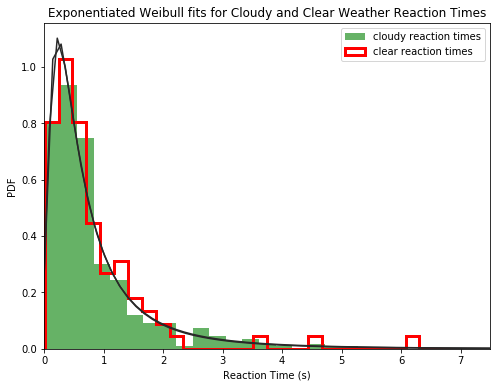

In [22]:
cloudy_rxntime = df_dsg[df_dsg['Weather']=='cloudy']['ReactionTime'].dropna()
clear_rxntime = df_dsg[df_dsg['Weather']=='clear']['ReactionTime'].dropna()

plt.figure(figsize=(8,6))
sns.distplot(cloudy_rxntime, kde=False, fit=st.exponweib, bins=90, label = 'cloudy reaction times', hist_kws={"linewidth": 3,
                            "alpha": 0.6, "color": "green"})
sns.distplot(clear_rxntime, kde=False, fit=st.exponweib, bins=90, label = 'clear reaction times', hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "red"})
plt.xlim([0,7.5])
plt.ylabel('PDF')
plt.xlabel('Reaction Time (s)')
plt.title('Exponentiated Weibull fits for Cloudy and Clear Weather Reaction Times')
plt.legend()
plt.show()